In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import cv2

In [1]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to_path):
    # Ensure the destination directory exists
    if not os.path.exists(extract_to_path):
        os.makedirs(extract_to_path)

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents
        zip_ref.extractall(extract_to_path)

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/archive.zip'
extract_to_path ='/content/drive/MyDrive/Dataset_cat_dog/'

# Unzip the file
unzip_file(zip_file_path, extract_to_path)

print(f'Files extracted to {extract_to_path}')


Files extracted to /content/drive/MyDrive/Dataset_cat_dog/


In [12]:
def load_images(directory, image_size=(64, 64)):
    images = []
    labels = []
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            label = 0 if subdir == 'cats' else 1  # 0 for cat, 1 for dog
            for filename in os.listdir(subdir_path):
                if filename.endswith('.jpg'):
                    img_path = os.path.join(subdir_path, filename)
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, image_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Paths to the train and test directories
train_dir = '/content/drive/MyDrive/Dataset_cat_dog/train'
test_dir = '/content/drive/MyDrive/Dataset_cat_dog/test'

In [13]:
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)


In [14]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [17]:
y_pred = svm_model.predict(X_test_scaled)

In [18]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

         Cat       0.57      0.57      0.57        70
         Dog       0.57      0.57      0.57        70

    accuracy                           0.57       140
   macro avg       0.57      0.57      0.57       140
weighted avg       0.57      0.57      0.57       140

Confusion Matrix:
[[40 30]
 [30 40]]


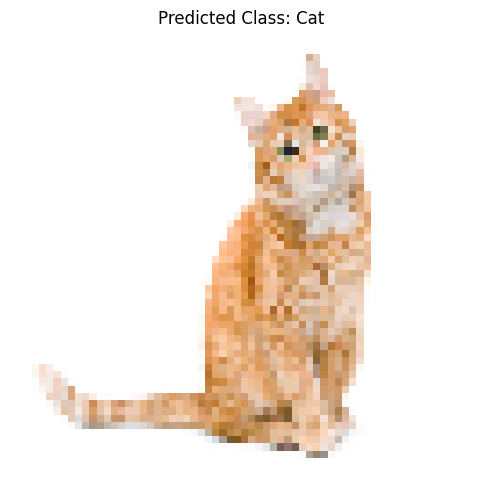

In [20]:
# Test the model on single Images


import numpy as np
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path, image_size=(64, 64)):
    """
    Load and preprocess a single image.
    """
    img = cv2.imread(image_path)
    img = cv2.resize(img, image_size)
    img = img.astype('float32') / 255.0
    img_flattened = img.reshape(1, -1)
    return img, img_flattened

def predict_image(svm_model, scaler, image_path):
    """
    Predict whether the image is a cat or a dog using the trained SVM model.
    """

    img, img_preprocessed = preprocess_image(image_path)


    img_scaled = scaler.transform(img_preprocessed)


    prediction = svm_model.predict(img_scaled)

    class_names = ['Cat', 'Dog']
    predicted_class = class_names[prediction[0]]

    return img, predicted_class

def display_image_with_prediction(image_path, svm_model, scaler):
    """
    Display the image with the predicted label.
    """
    img, predicted_class = predict_image(svm_model, scaler, image_path)


    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')  # Hide axes
    plt.show()


image_path = '/content/drive/MyDrive/Dataset_cat_dog/istockphoto-1443562748-612x612.jpg'
display_image_with_prediction(image_path, svm_model, scaler)


